# Online shoppers purchasing intention





**Introduction** : Online Shoppers Purchase Intention machine learning project, the goal is to analyze customer behavior data to predict whether a user will make a purchase or not. This project revolves around understanding patterns in online shoppers activity and using machine learning models to classify or predict purchase intentions.

**Objective** : To predict whether an online shopper will complete a purchase (yes/no or binary classification) based on their browsing behavior and other session data. This will help businesses enhance customer experience, optimize marketing strategies, and increase conversions.

**Data Collection** : The data is collected from a secondary source that is UCIrvine Machine Learning Repository. The dataset was donated to the repository and it appeared as an introductory paper Real-time prediction of online shoppers’ purchasing intention using multilayer perceptron and LSTM recurrent neural networks published in Neural computing & applications.

In [1]:
# Importing the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# Loading the Dataset

data = pd.read_csv("C:/Users/imash/OneDrive/Desktop/online_shoppers_intention.csv")
data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


The dataset consist of 12330 rows and 18 columns. Two columns from the visible portion seem to be of object type and another two columns seem to be Boolean. The remaining columns are in numerical form.

# Column Descriptions:

Administrative: This is the number of pages of this type (administrative) that the user visited.

Administrative_Duration: This is the amount of time spent in this category of pages.

Informational: This is the number of pages of this type (informational) that the user visited.

Informational_Duration: This is the amount of time spent in this category of pages.

ProductRelated: This is the number of pages of this type (product related) that the user visited.

ProductRelated_Duration: This is the amount of time spent in this category of pages.

BounceRates: The percentage of visitors who enter the website through that page and exit without triggering any additional tasks.

ExitRates: The percentage of pageviews on the website that end at that specific page.

PageValues: The average value of the page averaged over the value of the target page and/or the completion of an eCommerce transaction.

SpecialDay: This value represents the closeness of the browsing date to special days or holidays (eg Mother's Day or Valentine's day) in which the transaction is more likely to be finalized. More information about how this value is calculated below.

Month: Contains the month the pageview occurred, in string form.

OperatingSystems: An integer value representing the operating system that the user was on when viewing the page.

Browser: An integer value representing the browser that the user was using to view the page.

Region: An integer value representing which region the user is located in.

TrafficType: An integer value representing what type of traffic the user is categorized into.

VisitorType: A string representing whether a visitor is New Visitor, Returning Visitor, or Other.

Weekend: A boolean representing whether the session is on a weekend.

Revenue: A boolean representing whether or not the user completed the purchase.


# Analysing the Dataset

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Confirmed that the dataset contains two columns of object dtype and two columns of bool dtype. There seem to be no null-values in the dataset

In [11]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


From the above description it is evident that the dataset contains outliers which need to be removed

# Data Cleaning

In [12]:
#Checking for missing values

Total = data.isnull().sum().sort_values(ascending=False)
Percent = (data.isnull().sum()*100/data.isnull().count()).sort_values(ascending=False)
Percent

Administrative             0.0
Administrative_Duration    0.0
Weekend                    0.0
VisitorType                0.0
TrafficType                0.0
Region                     0.0
Browser                    0.0
OperatingSystems           0.0
Month                      0.0
SpecialDay                 0.0
PageValues                 0.0
ExitRates                  0.0
BounceRates                0.0
ProductRelated_Duration    0.0
ProductRelated             0.0
Informational_Duration     0.0
Informational              0.0
Revenue                    0.0
dtype: float64

No missing values found

In [13]:
#Checking duplicates

data.duplicated().sum()

125

In [15]:
# Eliminating the duplicates

data.drop_duplicates(inplace=True)
data.shape

(12205, 18)

In [16]:
data['Revenue'].value_counts()

Revenue
False    10297
True      1908
Name: count, dtype: int64

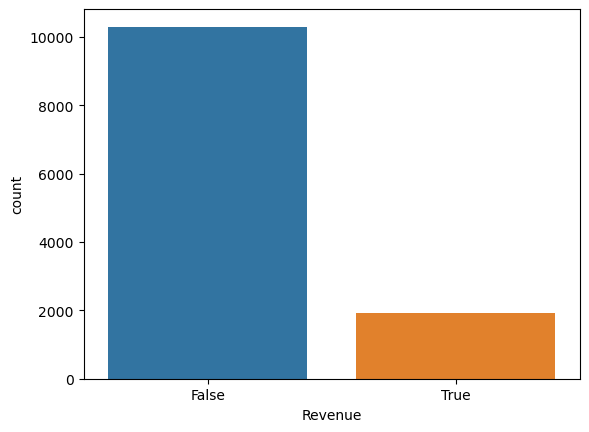

In [17]:
# Checking the distribution of customers on Revenue (Target column)

df_target = df['Revenue'].copy()
df_target.value_counts()

# plot the countplot of the variable 'Revenue'
sns.countplot(x = df_target)

plt.show()

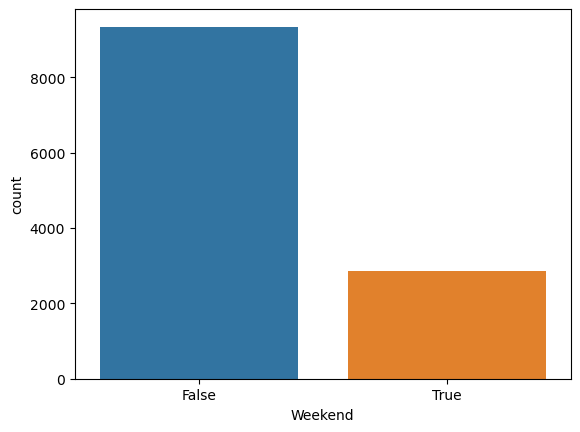

In [18]:
# Checking the distribution of customers on Weekend column

data_target = data['Weekend'].copy()
data_target.value_counts()

# plot the countplot of the variable 'Revenue'
sns.countplot(x = data_target)

plt.show()

What we observed here?

From the above information we see that the distribution of Revenue and Weekend data are hightly imbalanced.

# Feature selection

In [19]:
new_data = data.drop(columns="Revenue")
new_data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False


Here the target column is dropped and rest of the columns are kept as features